# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [89]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


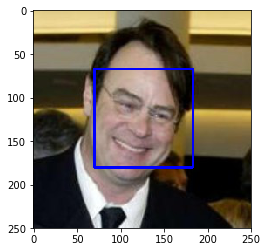

In [116]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [90]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [13]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_count = dog_count = 0
for image_path in human_files_short:
    if face_detector(image_path):
#         print("human face detected in human pic")
        human_count+=1
        
for image_path in dog_files_short:
    if face_detector(image_path):
#         print("human face detected in dog pic")
        
        dog_count+=1

human_percent = human_count/len(human_files_short)*100.00
dog_percent = dog_count/len(dog_files_short)*100.00
print(f'{human_percent} % the images in human_files_short have a detected dog')
print(f'{dog_percent} % the images in dog_files_short have a detected dog')
        

98.0 % the images in human_files_short have a detected dog
17.0 % the images in dog_files_short have a detected dog


In [103]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_count = dog_count = 0
for image_path in human_files_short:
    if face_detector(image_path):
#         print("human face detected in human pic")
        human_count+=1
        
for image_path in dog_files_short:
    if face_detector(image_path):
#         print("human face detected in dog pic")
        
        dog_count+=1

human_percent = human_count/len(human_files_short)*100.00
dog_percent = dog_count/len(dog_files_short)*100.00
print(f'{human_percent} % the images in human_files_short have a detected dog')
print(f'{dog_percent} % the images in dog_files_short have a detected dog')
        

98.0 % the images in human_files_short have a detected dog
17.0 % the images in dog_files_short have a detected dog


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [91]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [92]:
from PIL import Image
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    
    loader = transforms.Compose([
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            normalize,
        ])
    
    image = Image.open(img_path)
    image = loader(image)
    if use_cuda:
        image = image.cuda()
    VGG16.eval()
    #here we are using  unsqueze because pytorch expects data like batch_size , data
    output = F.softmax(VGG16.forward(image.unsqueeze(0)),dim=1).argmax().item() 
    
    ## Return the *index* of the predicted class for that image
    return output
# VGG16_predict(human_files[0])

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [93]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    img_class = VGG16_predict(img_path)
    if img_class in range(151,279):
        return True
    return False
    
#     return None # true/false
# dog_detector(dog_files[0])

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [20]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_count = dog_count = 0
for image_path in human_files_short:
    if dog_detector(image_path):
        human_count+=1
        
for image_path in dog_files_short:
    if dog_detector(image_path):
        
        dog_count+=1

human_percent = human_count/len(human_files_short)*100.00
dog_percent = dog_count/len(dog_files_short)*100.00
print(f'{human_percent} % the images in human_files_short have a detected dog')
print(f'{dog_percent} % the images in dog_files_short have a detected dog')

1.0 % the images in human_files_short have a detected dog
91.0 % the images in dog_files_short have a detected dog


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [8]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
#DOWNLOADING INCEPTION V3
import torch
import torchvision.models as models

# define INCEPTIONV3 model
inception = models.inception_v3(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    inception = inception.cuda()

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 78943930.44it/s]


In [116]:
from PIL import Image
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F

def inception_predict(img_path):
    '''
    Use pre-trained inception v3 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to inception model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    
    loader = transforms.Compose([
            transforms.CenterCrop(299), #image size expected 299 from documentation
            transforms.ToTensor(),
            normalize,
        ])
    
    image = Image.open(img_path)
    image = loader(image)
    inception.eval()
    #here we are using  unsqueze because pytorch expects data like batch_size , data
    output = F.softmax(inception.forward(image.unsqueeze(0)),dim=1).argmax().item() 
    
    ## Return the *index* of the predicted class for that image
    return output
# VGG16_predict(human_files[0])

### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_inception(img_path):
    ## TODO: Complete the function.
    img_class = inception_predict(img_path)
    if img_class in range(151,279):
        return True
    return False
    


True

In [117]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
print('Dog detection performance test with inceptionv3 model')
human_count = dog_count = 0
for image_path in human_files_short:
    if dog_detector(image_path):
        human_count+=1
        
for image_path in dog_files_short:
    if dog_detector(image_path):
        
        dog_count+=1

human_percent = human_count/len(human_files_short)*100.00
dog_percent = dog_count/len(dog_files_short)*100.00
print(f'{human_percent} % the images in human_files_short have a detected dog')
print(f'{dog_percent} % the images in dog_files_short have a detected dog')

Dog detection performance test with inceptionv3 model
1.0 % the images in human_files_short have a detected dog
91.0 % the images in dog_files_short have a detected dog


#### Both model seem to show equal performance on detecting dog.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import torch
use_cuda = torch.cuda.is_available()


In [2]:
import os
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
## image transormations for all the test and validation sets without augmentation
transform_image_aug = transforms.Compose([transforms.Resize(255),
                                            transforms.RandomHorizontalFlip(), 
                                          #removing horizontal flip. i think this is making training difficult
                                            transforms.RandomRotation(15),
                                            transforms.RandomResizedCrop(224),
                                             transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                std=[0.229, 0.224, 0.225])])

## image transormations for train set with augmentation
transform_image_no_aug = transforms.Compose([transforms.Resize(255),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                               std=[0.229, 0.224, 0.225])
                                         ])

train_loader = DataLoader(datasets.ImageFolder('/data/dog_images/train',transform = transform_image_aug),
                         batch_size = 64,shuffle=True)
test_loader = DataLoader(datasets.ImageFolder('/data/dog_images/test',transform = transform_image_no_aug),
                        batch_size = 64, shuffle = True)
valid_loader = DataLoader(datasets.ImageFolder('/data/dog_images/valid', transform = transform_image_no_aug),
                         batch_size = 64, shuffle = True)

loaders_scratch = {"train":train_loader,'test':test_loader,'valid':valid_loader}

In [3]:
# TODO: make classes dict with dataset 

classess = datasets.ImageFolder('/data/dog_images/train',transform = transform_image_aug).classes

In [4]:
import numpy as np
def im_convert(tensor):
    """ Display a tensor as an image. """
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

In [5]:
img,label = next(iter(loaders_scratch['train']))
#viewimg an image
import matplotlib.pyplot as plt
plt.imshow(im_convert(img[4]))

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 

1) i decided to use two different transforms. One with image augmentation for test datasets.It combines few augmentation techniques. both transforms resize image to dimension 255*255 and crops at the last step to 224 * 224. I choose this size because this was the default size for VGG16 model. And also it seems that this size is good enough and wouldn't add calculation burden. i am also thinking about using 299 * 299 if the error is below 10%.

2) Yes i decided to augment the data. While viewing the images in training set. the number was small. so i decided to augment the train dataset.  
i added randomHorizontal flips, rotation 30 degree and random resize

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [6]:
import torch.nn as nn

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ## Follow the architecture of VGG-16
        # Size 224
        self.conv1_1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        # Size 112
        self.conv2_1 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        # Size 56
        self.conv3_1 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        # Size 28
        self.conv4_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        # Size 14
        self.conv5_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        
        # Batch Normalization  to improve performance and stability
        # It provides zero mean and unit variance as inputs to any layers.
        self.batch_norm16 = nn.BatchNorm2d(16)
        self.batch_norm32 = nn.BatchNorm2d(32)
        self.batch_norm64 = nn.BatchNorm2d(64)
        self.batch_norm128 = nn.BatchNorm2d(128)
        self.batch_norm256 = nn.BatchNorm2d(256)
        self.batch_norm512 = nn.BatchNorm2d(512)
        
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout()
        
        # Size 7
        self.fc1 = nn.Linear(512 * 7 * 7, 1000) # will reduce to 2000 if current architecture doesnot work
        self.fc2 = nn.Linear(1000, 500) # reduce to 1000 if current architecture doesnot work
        # 133(Number of breeds)
        self.fc3 = nn.Linear(500, 133)
    
    # Feedforward
    def forward(self, x):
        x = self.relu(self.batch_norm16(self.conv1_1(x)))
        x = self.relu(self.batch_norm16(self.conv1_2(x)))
        x = self.max_pool(x)
        
        x = self.relu(self.batch_norm32(self.conv2_1(x)))
        x = self.relu(self.batch_norm32(self.conv2_2(x)))
        x = self.max_pool(x)
        
        x = self.relu(self.batch_norm64(self.conv3_1(x)))
        x = self.relu(self.batch_norm64(self.conv3_2(x)))
        x = self.relu(self.batch_norm64(self.conv3_3(x)))
        x = self.max_pool(x)
        
        x = self.relu(self.batch_norm128(self.conv4_1(x)))
        x = self.relu(self.batch_norm128(self.conv4_2(x)))
        x = self.relu(self.batch_norm128(self.conv4_3(x)))
        x = self.max_pool(x)
        
        x = self.relu(self.batch_norm256(self.conv5_1(x)))
        x = self.relu(self.batch_norm256(self.conv5_2(x)))
        x = self.relu(self.batch_norm512(self.conv5_3(x)))
        x = self.max_pool(x)
        
        # It returns a new tensor which has a different size
        # and it's the same data of self tensor
        # The -1 means inferring the size from other dimensions.
        x = x.view(x.size(0), -1)
        
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# Create CNN instance!
model_scratch = Net()

# If CUDA is avaliable, Move Tensors to GPU
if use_cuda:
    model_scratch.cuda()

In [7]:
print(model_scratch)


Net(
  (conv1_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_3): Conv2d(256, 512, kernel_si

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
My Input image was 244 * 244.
I started with a 16 depth 3*3 filter and increased depth by 2 times for each  the other convolution layer.
so the size with max pooling in the consecutive conv layers became

244

112

56

28

14

7 

I used padding of 1 because i wanted to keep the width and height of the images constant.
My starting image dimension was 224. so after 5 conv operations and max pooling the size is now reduced to 7. I think this will capture the feature of the breeds.
i added 3 fully connected layers. because the first fc layer was around 25k. so it would make sense to slowly do classification with few more fc layers.


ALso for all layers except the classifier i.e the last fc layer. i used relu activation. because in the whole course. relu has proven itself in selecting relevant features.

Also, I also did some reasearch before building the model. so that i can lookup what has worked in such case. i read through few keras implementation of same task also. and finally after trying few models, i tried to make it more like vgg16.

IF the architecture fails. i will try to make the model deeper and increase depth

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [8]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [9]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(),lr=0.002 ,momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):

    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # calculate batch loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # parameter update
            optimizer.step()
            # update training loss
            train_loss += loss.item() * data.size(0)
            
        ######################
        # validate the model #
        ######################
        
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            ## update the average validation loss
            
            # forward pass
            output = model(data)
            # batch loss
            loss = criterion(output, target)
            # update validation loss
            valid_loss += loss.item() * data.size(0)
        
        # calculate average losses
        train_loss = train_loss / len(train_loader.dataset)
        valid_loss = valid_loss / len(valid_loader.dataset)
        
        # print training/validation statistics 
        print('Epoch: {}\tTraining Loss: {:.6f}\t Validation Loss: {:.6f}'.
             format(epoch, train_loss, valid_loss))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).    Saving model...'.
                 format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    
    # return trained model
    return model

In [ ]:
save_path = 'model_scratch.pt'
# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch,criterion_scratch, use_cuda, save_path)



Epoch: 1	Training Loss: 4.880489	 Validation Loss: 4.850027
Validation loss decreased (inf --> 4.850027).    Saving model...
Epoch: 2	Training Loss: 4.825913	 Validation Loss: 4.768710
Validation loss decreased (4.850027 --> 4.768710).    Saving model...
Epoch: 3	Training Loss: 4.742511	 Validation Loss: 4.630165
Validation loss decreased (4.768710 --> 4.630165).    Saving model...
Epoch: 4	Training Loss: 4.581246	 Validation Loss: 4.422454
Validation loss decreased (4.630165 --> 4.422454).    Saving model...
Epoch: 5	Training Loss: 4.443304	 Validation Loss: 4.275772
Validation loss decreased (4.422454 --> 4.275772).    Saving model...
Epoch: 6	Training Loss: 4.355337	 Validation Loss: 4.203464
Validation loss decreased (4.275772 --> 4.203464).    Saving model...
Epoch: 7	Training Loss: 4.274756	 Validation Loss: 4.096450
Validation loss decreased (4.203464 --> 4.096450).    Saving model...
Epoch: 8	Training Loss: 4.176202	 Validation Loss: 4.043997
Validation loss decreased (4.096450

In [10]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [1]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

#     model.eval()
    
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        with torch.no_grad():
            if use_cuda:
                data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update average test loss 
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)

    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [12]:
# call test function  
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.521186


Test Accuracy: 14% (121/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [94]:
## TODO: Specify data loaders

import torch
use_cuda = torch.cuda.is_available()


import os
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
## image transormations for all the test and validation sets without augmentation
transform_image_aug = transforms.Compose([transforms.Resize(255),
                                            transforms.RandomHorizontalFlip(), 
                                          #removing horizontal flip. i think this is making training difficult
                                            transforms.RandomRotation(15),
                                            transforms.RandomResizedCrop(224),
                                             transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                std=[0.229, 0.224, 0.225])])

## image transormations for train set with augmentation
transform_image_no_aug = transforms.Compose([transforms.Resize(255),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                               std=[0.229, 0.224, 0.225])
                                         ])

train_loader = DataLoader(datasets.ImageFolder('/data/dog_images/train',transform = transform_image_aug),
                         batch_size = 32,shuffle=True)
test_loader = DataLoader(datasets.ImageFolder('/data/dog_images/test',transform = transform_image_no_aug),
                        batch_size = 32, shuffle = True)
valid_loader = DataLoader(datasets.ImageFolder('/data/dog_images/valid', transform = transform_image_no_aug),
                         batch_size = 32, shuffle = True)

loaders_transfer = {"train":train_loader,'test':test_loader,'valid':valid_loader}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [95]:
import torchvision.models as models
import torch.nn as nn
import numpy as np
from torch import optim
from PIL import ImageFile
from PIL import Image

ImageFile.LOAD_TRUNCATED_IMAGES = True

## TODO: Specify model architecture 
import torch
import torchvision.models as models

# define VGG16 model
model_transfer = models.vgg16(pretrained=True)

# freezing the pretrained weights
for param in model_transfer.features.parameters():
    param.required_grad =False

model_transfer.classifier[6] = nn.Linear(4096,133) #changine last layer for our breed classification need.

if use_cuda:
    model_transfer = model_transfer.cuda()

In [25]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [33]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(),lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [34]:
torch.cuda.empty_cache()

In [ ]:
# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')



Epoch: 1	Training Loss: 4.627373	 Validation Loss: 3.972088
Validation loss decreased (inf --> 3.972088).    Saving model...
Epoch: 2	Training Loss: 3.727545	 Validation Loss: 2.678016
Validation loss decreased (3.972088 --> 2.678016).    Saving model...
Epoch: 3	Training Loss: 2.834821	 Validation Loss: 1.772966
Validation loss decreased (2.678016 --> 1.772966).    Saving model...
Epoch: 4	Training Loss: 2.178398	 Validation Loss: 1.327036
Validation loss decreased (1.772966 --> 1.327036).    Saving model...
Epoch: 5	Training Loss: 1.851496	 Validation Loss: 1.067325
Validation loss decreased (1.327036 --> 1.067325).    Saving model...
Epoch: 6	Training Loss: 1.621776	 Validation Loss: 0.980140
Validation loss decreased (1.067325 --> 0.980140).    Saving model...
Epoch: 7	Training Loss: 1.519393	 Validation Loss: 0.857320
Validation loss decreased (0.980140 --> 0.857320).    Saving model...
Epoch: 8	Training Loss: 1.405150	 Validation Loss: 0.831259
Validation loss decreased (0.857320

In [96]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [36]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.745329


Test Accuracy: 75% (629/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [97]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import ImageFile
from PIL import Image

ImageFile.LOAD_TRUNCATED_IMAGES = True

import cv2
import matplotlib.pyplot as plt
import torch
use_cuda = torch.cuda.is_available()
# from PIL import I
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in datasets.ImageFolder('/data/dog_images/train',transform = transform_image_aug).classes]


def predict_breed_transfer(img_path):
    #load image
    image = Image.open(img_path)
    # load the image and return the predicted breed
    loader = transforms.Compose([transforms.Resize(255),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                               std=[0.229, 0.224, 0.225])
                                         ])
    image_tensor = loader(image).unsqueeze_(0) #without unsqueeze_ got an error.
    
    if use_cuda:
        image_tensor = image_tensor.cuda()
        model = model_transfer.cuda()
    
    output = model(image_tensor)
    softmax = nn.Softmax(dim=1)
    pred = softmax(output)
    
    #top 3 pred
    top_pred  = torch.topk(pred,3)
    output_label = [class_names[i] for i in top_pred[1][0]]
    output_probability  = [i*100.00 for i in top_pred[0][0]]
    return output_label,output_probability


In [98]:
predict_breed_transfer('images/American_water_spaniel_00648.jpg')

(['Boykin spaniel', 'American water spaniel', 'Field spaniel'],
 [tensor(67.2314, device='cuda:0'),
  tensor(15.5584, device='cuda:0'),
  tensor(4.7089, device='cuda:0')])

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [99]:
def display_image(img_path):
    # Display image
    img = Image.open(img_path)
    _, ax = plt.subplots()
    ax.imshow(img)
    plt.axis('off')
    plt.show()

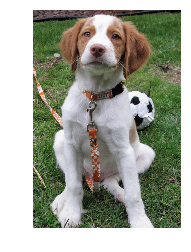

In [100]:
display_image('images/Brittany_02625.jpg')

In [111]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    # checking for dog
    is_dog = dog_detector(img_path)
    display_image(img_path)
    labels,probs = predict_breed_transfer(img_path)
    print('*'*20)
    if is_dog:
        print('Hey. It\'s a dog')
        print('Top 3 Breed breeds')
        for label,prob in zip(labels,probs):
            print('{}: {:.2f} % '.format(label,prob))
            
        print('*'*20)
        
        return
    
    is_human = face_detector(img_path)
    if is_human:
        print('Well Hello Human. What are you doing among dogs?')
        print('Find your spirit Dog below')
        for label,prob in zip(labels,probs):
            print('{}: {:.2f} % '.format(label,prob))
        print('*'*20)

        return
    print("Hmm! I couldn't find what was in the picture. Better luck next time")
    print('*'*20)

        

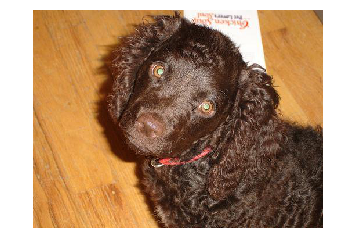

********************
Hey. It's a dog
Top 3 Breed breeds
American water spaniel: 54.48 % 
Boykin spaniel: 43.87 % 
Field spaniel: 0.72 % 
********************


In [112]:
run_app('images/American_water_spaniel_00648.jpg')

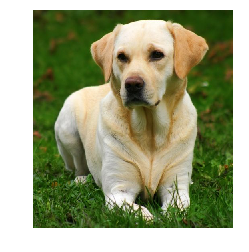

********************
Hey. It's a dog
Top 3 Breed breeds
Labrador retriever: 89.63 % 
American staffordshire terrier: 2.07 % 
Dogue de bordeaux: 1.88 % 
********************


In [114]:
run_app('images/Labrador_retriever_06457.jpg')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

the output is better than i expected. But i think i could have got it to work better. Because i stopped training while the validation  was still decreasing. I think i could have improved that

Also i think i should have increased augmentaion for training images to generate more training images

Also there is too much code redundency everywhere. I guess that is okay while i am still learning. But i will clean up everything and try to deploy this to heroku as an api.

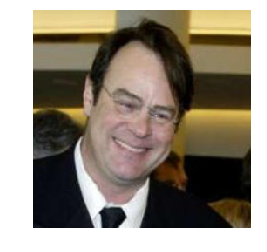

********************
Well Hello Human. What are you doing among dogs?
Find your spirit Dog below
American staffordshire terrier: 6.53 % 
Basenji: 3.28 % 
Beagle: 2.77 % 
********************


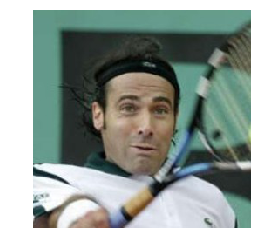

********************
Well Hello Human. What are you doing among dogs?
Find your spirit Dog below
Norwegian lundehund: 6.74 % 
Australian shepherd: 5.14 % 
Nova scotia duck tolling retriever: 4.23 % 
********************


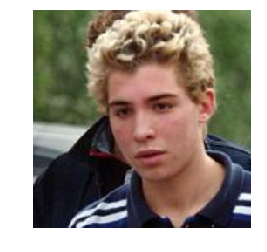

********************
Well Hello Human. What are you doing among dogs?
Find your spirit Dog below
Lakeland terrier: 4.94 % 
Norfolk terrier: 2.50 % 
Australian terrier: 2.21 % 
********************


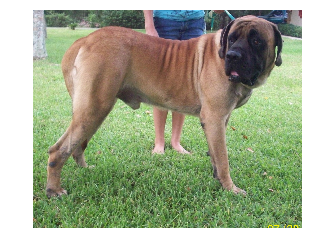

********************
Hey. It's a dog
Top 3 Breed breeds
Bullmastiff: 94.29 % 
Mastiff: 4.94 % 
Boxer: 0.29 % 
********************


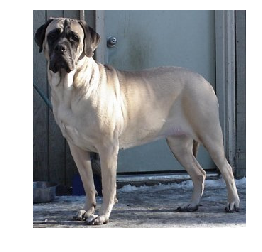

********************
Hey. It's a dog
Top 3 Breed breeds
Chinese shar-pei: 45.87 % 
Bullmastiff: 21.40 % 
Boxer: 11.36 % 
********************


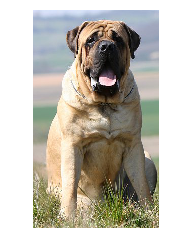

********************
Hey. It's a dog
Top 3 Breed breeds
Bullmastiff: 78.41 % 
Chinese shar-pei: 11.92 % 
Mastiff: 6.34 % 
********************


In [117]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [118]:
!wget https://media.wired.com/photos/5d09594a62bcb0c9752779d9/125:94/w_1994,h_1500,c_limit/Transpo_G70_TA-518126.jpg

--2019-11-10 05:59:33--  https://media.wired.com/photos/5d09594a62bcb0c9752779d9/125:94/w_1994,h_1500,c_limit/Transpo_G70_TA-518126.jpg
Resolving media.wired.com (media.wired.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.wired.com (media.wired.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 581947 (568K) [image/jpeg]
Saving to: ‘Transpo_G70_TA-518126.jpg’

Transpo_G70_TA-5181 100%[===================>] 568.31K  --.-KB/s    in 0.05s   

2019-11-10 05:59:33 (10.8 MB/s) - ‘Transpo_G70_TA-518126.jpg’ saved [581947/581947]



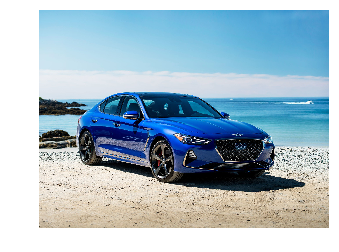

********************
Hmm! I couldn't find what was in the picture. Better luck next time
********************


In [119]:
run_app('Transpo_G70_TA-518126.jpg')

In [120]:
!wget https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fspecials-images.forbesimg.com%2Fdam%2Fimageserve%2F1007655361%2F960x0.jpg%3Ffit%3Dscale

--2019-11-10 06:00:13--  https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fspecials-images.forbesimg.com%2Fdam%2Fimageserve%2F1007655361%2F960x0.jpg%3Ffit%3Dscale
Resolving thumbor.forbes.com (thumbor.forbes.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to thumbor.forbes.com (thumbor.forbes.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70551 (69K) [image/jpeg]
Saving to: ‘https:%2F%2Fspecials-images.forbesimg.com%2Fdam%2Fimageserve%2F1007655361%2F960x0.jpg?fit=scale’

https:%2F%2Fspecial 100%[===================>]  68.90K  --.-KB/s    in 0.02s   

2019-11-10 06:00:13 (3.23 MB/s) - ‘https:%2F%2Fspecials-images.forbesimg.com%2Fdam%2Fimageserve%2F1007655361%2F960x0.jpg?fit=scale’ saved [70551/70551]



In [122]:
!mv https:%2F%2Fspecials-images.forbesimg.com%2Fdam%2Fimageserve%2F1007655361%2F960x0.jpg?fit=scale deer.jpg

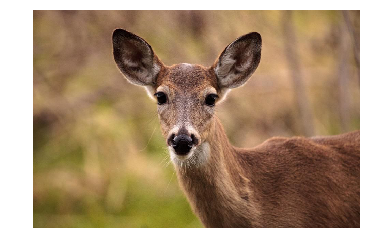

********************
Hmm! I couldn't find what was in the picture. Better luck next time
********************


In [123]:
run_app('deer.jpg')

In [125]:
!wget https://imgix.bustle.com/uploads/image/2019/3/26/84dd3398-a4b5-4718-b44b-59188d13b954-shutterstock_588835355.jpg?w=970&h=546&fit=crop&crop=faces&auto=format&q=70

In [126]:
!ls

deer.jpg	  haarcascades	    model_transfer.pt
dog_app-cn.ipynb  images	    README.md
dog_app.ipynb	  model_scratch.pt  Transpo_G70_TA-518126.jpg


In [127]:
!wget https://static.independent.co.uk/s3fs-public/thumbnails/image/2016/08/24/11/hijab-stock-photo.jpg

--2019-11-10 06:02:55--  https://static.independent.co.uk/s3fs-public/thumbnails/image/2016/08/24/11/hijab-stock-photo.jpg
Resolving static.independent.co.uk (static.independent.co.uk)... 151.101.1.184, 151.101.65.184, 151.101.129.184, ...
Connecting to static.independent.co.uk (static.independent.co.uk)|151.101.1.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99199 (97K) [image/jpeg]
Saving to: ‘hijab-stock-photo.jpg’

hijab-stock-photo.j 100%[===================>]  96.87K  --.-KB/s    in 0.03s   

2019-11-10 06:02:56 (3.15 MB/s) - ‘hijab-stock-photo.jpg’ saved [99199/99199]



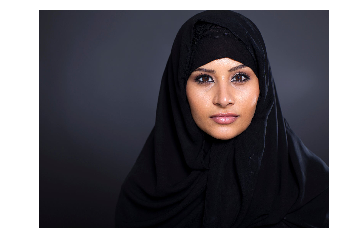

********************
Well Hello Human. What are you doing among dogs?
Find your spirit Dog below
English toy spaniel: 10.09 % 
Black and tan coonhound: 7.17 % 
Doberman pinscher: 4.10 % 
********************


In [128]:
run_app('hijab-stock-photo.jpg')

In [130]:
! wget https://i.ytimg.com/vi/8HVc77PfM9k/maxresdefault.jpg

--2019-11-10 06:04:16--  https://i.ytimg.com/vi/8HVc77PfM9k/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 173.194.197.119, 2607:f8b0:4001:c03::77
Connecting to i.ytimg.com (i.ytimg.com)|173.194.197.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89520 (87K) [image/jpeg]
Saving to: ‘maxresdefault.jpg’

maxresdefault.jpg   100%[===================>]  87.42K  --.-KB/s    in 0.001s  

2019-11-10 06:04:16 (63.7 MB/s) - ‘maxresdefault.jpg’ saved [89520/89520]



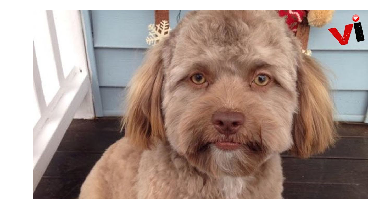

********************
Hey. It's a dog
Top 3 Breed breeds
Havanese: 22.77 % 
Wirehaired pointing griffon: 16.09 % 
Clumber spaniel: 12.86 % 
********************


In [131]:
run_app('maxresdefault.jpg')